# Practical 11
## Case Study – Study and prepare a report of Machine translation of Google.

**Case Study: Google's Machine Translation**

**Introduction**

Google's machine translation (MT) system has revolutionized the way we interact with languages globally. By leveraging advanced artificial intelligence and machine learning techniques, Google Translate has become an indispensable tool for billions of users worldwide. This case study delves into the technical aspects, challenges, and future directions of Google's MT system.

**Key Technologies and Approaches**

* **Neural Machine Translation (NMT):**
    * Core technology behind Google Translate's advancements.
    * Employs artificial neural networks to process input text and generate translations.
    * Captures complex language patterns and context, leading to more accurate and fluent translations.
* **Statistical Machine Translation (SMT):**
    * Earlier approach that relied on statistical models to translate text.
    * While less sophisticated than NMT, it still plays a role in certain scenarios.
* **Data-Driven Approach:**
    * Google leverages massive datasets of translated text to train its models.
    * Continuous learning and adaptation to new data improve translation quality over time.
* **Language Modeling:**
    * Incorporates language models to understand the underlying structure and meaning of text.
    * Enhances translation accuracy and fluency by considering the context of words and sentences.

**Challenges and Limitations**

* **Language Diversity:**
    * Translating between languages with limited parallel data remains a significant challenge.
    * Google addresses this by developing techniques like zero-shot and few-shot learning.
* **Cultural Nuances and Idioms:**
    * Accurate translation of cultural references and idioms is complex.
    * Google's models are constantly being refined to better handle these nuances.
* **Real-time Translation:**
    * Real-time translation, especially for low-resource languages, requires efficient algorithms and powerful hardware.
    * Google continues to push the boundaries of real-time translation technology.

**Future Directions**

* **Multilingual Models:**
    * Developing models that can translate between multiple languages simultaneously.
    * Improving translation quality and efficiency for a wider range of language pairs.
* **Contextual Understanding:**
    * Leveraging contextual information to enhance translation accuracy, especially in ambiguous or domain-specific text.
    * Incorporating knowledge graphs and semantic understanding to improve translation quality.
* **Ethical Considerations:**
    * Addressing potential biases and ensuring fairness in translation systems.
    * Developing guidelines and tools to mitigate biases and promote ethical AI.

**Conclusion**

Google's machine translation system is a testament to the power of AI and machine learning. By continuously pushing the boundaries of technology, Google Translate has transformed the way we communicate and access information across language barriers. As the field of AI continues to evolve, we can expect even more impressive advancements in machine translation in the years to come.

**Potential Research Areas**

* **Domain-Specific Translation:**
    * Developing models tailored to specific domains like medicine, law, or finance.
* **Translation Quality Assessment:**
    * Creating automated metrics to evaluate the quality of machine translations.
* **Low-Resource Language Translation:**
    * Exploring techniques to improve translation quality for languages with limited data.
* **Post-Editing and Human-in-the-Loop:**
    * Integrating human expertise to refine machine translations and improve accuracy.

By delving deeper into these areas, researchers and engineers can further enhance the capabilities of machine translation systems and unlock new possibilities for global communication.

In [1]:

from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")

tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")

from tkinter import *
from tkinter import ttk

class Root(Tk):
    
    def __init__(self):
        
        super(Root, self).__init__()
        
        self.title("Text Translator")
        self.minsize(5, 5)
        
        self.labelFrame = ttk.LabelFrame(self, text = "SELECT")
        self.labelFrame.grid(column = 0, row = 2, padx = 10, pady = 10)
        
        self.labelFrame2=ttk.LabelFrame(self, text = "SUBMIT")
        self.labelFrame2.grid(column = 0, row = 1, padx = 10, pady = 10)
        self.button()

    def button(self):

        self.button = ttk.Button(self.labelFrame, text = "Select Language To Translate",command = self.Dropdown)
        self.button.grid(column = 0, row = 0)
        
        self.text_area = Text(self, height=5, width=20, font=("",15))
        self.text_area.grid()
        
        self.button2 = ttk.Button(self.labelFrame2, text = "Enter Text To Translate",command = self.Input)
        self.button2.grid(column = 3, row = 5)

        self.output_area = Text(self, height=5, width=20, font=("", 15))
        self.output_area.grid()

    def Dropdown(self):
        
        self.language_var = StringVar()
        self.language_dropdown = ttk.Combobox(self.labelFrame, textvariable=self.language_var)
        self.language_dropdown['values'] = ["hi_IN", "ta_IN"]
        self.language_dropdown.grid(column=0, row=1)
        
    def Input(self):

        global article_en
        article_en = self.text_area.get("1.0", "end-1c")
    
        #print(self.language_var.get())
        model_inputs = tokenizer(article_en, return_tensors="pt")

        generated_tokens = model.generate(
            **model_inputs,
            forced_bos_token_id=tokenizer.lang_code_to_id[self.language_var.get()]
        )
        translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
        
        self.output_area.delete("1.0", "end-1c")
        self.output_area.insert(END, translation[0])
       
root = Root()
root.mainloop()


G:\Sem 7\NLP\Practicals\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


>>>>>>>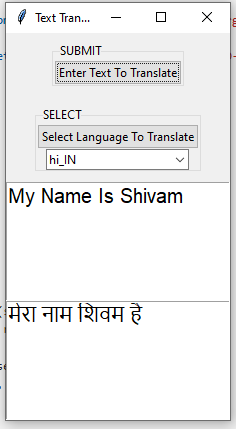